<a href="https://colab.research.google.com/github/sonaregina/ANN_MNIST/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam

## 1. Mengumpulkan data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 2. Menelaah data

In [ ]:
print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data testing: {len(X_test)}')

Jumlah data training: 60000
Jumlah data testing: 10000


fitur data terlihat bahwa data hanya memiliki data training berjumlah 60.000 dan data test sebnayak 10.000 dan belum memiliki data validasi sehingga memerlukan split untuk data validasi dengan data training

## 3. Melakukan validasi data (identifikasi noise)

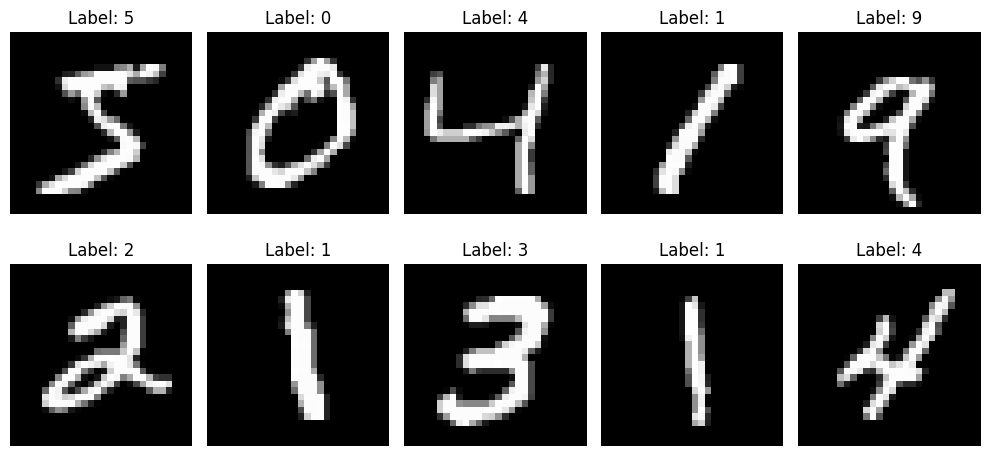

In [ ]:
# identifikasi noise pada data gambar dapat dilakukan dengan menampilkan data apakah ada data yang tidak sesuai atau labelnya tidak sesuai
# melihat catatan dari source dataset, data ini sudah bersih dan jelas karena meruoakan data latih sehingga tidak memerlukan identifikasi noise yang berlebih
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Menentukan objek data dan 5. membersihkan data (normalisasi data)

In [ ]:
# melakikan resize ukuran gambar menjadi 28 x 28 = 784 dengan dimensi 1
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255.0

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


## 6. Menentukan label (split data)

In [ ]:
# Split X_train_full jadi train (55k) dan validasi (5k)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=5000, random_state=42, stratify=y_train)

In [ ]:
# One-hot encode label
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (55000, 784), (55000, 10)
Validation set: (5000, 784), (5000, 10)
Test set: (10000, 784), (10000, 10)


## 7. mengontruksi

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 8. melakukan pemodelan

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7925 - loss: 0.7504 - val_accuracy: 0.9222 - val_loss: 0.2712
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9329 - loss: 0.2326 - val_accuracy: 0.9408 - val_loss: 0.2090
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9495 - loss: 0.1761 - val_accuracy: 0.9508 - val_loss: 0.1685
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9607 - loss: 0.1395 - val_accuracy: 0.9548 - val_loss: 0.1520
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9660 - loss: 0.1138 - val_accuracy: 0.9608 - val_loss: 0.1329
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9719 - loss: 0.1020 - val_accuracy: 0.9584 - val_loss: 0.1311
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9743 - loss: 0.0904 - val_accuracy: 0.9644 - val_loss: 0.1159
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9785 - loss: 0.0768 - val_accuracy: 0.

9. evaluasi

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi pada data test: {score[1]:.4f}")


Akurasi pada data test: 0.9718


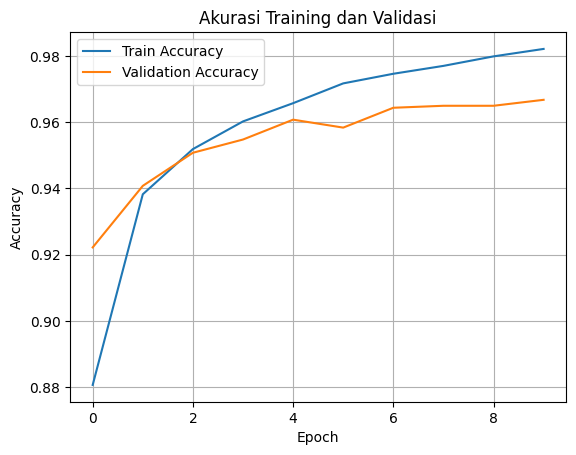

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


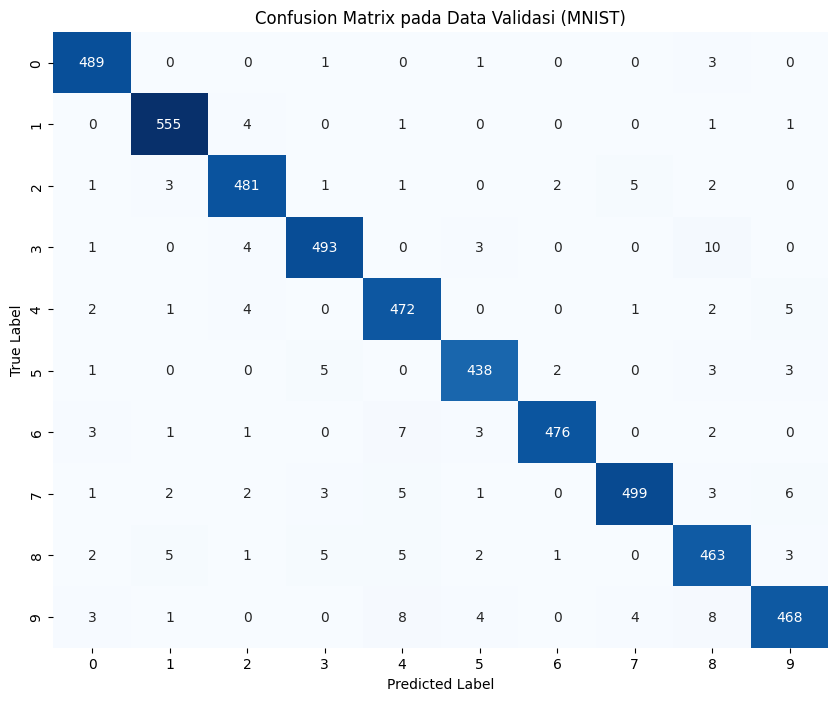

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np # Make sure numpy is imported
import matplotlib.pyplot as plt # Make sure matplotlib is imported
import seaborn as sns # Make sure seaborn is imported

y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# True label asli - Convert one-hot encoded y_val to single class labels
y_val_true = np.argmax(y_val, axis=1)

# 5. Confusion Matrix & Visualisasi
cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix pada Data Validasi (MNIST)')
plt.show()

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_val_true, y_val_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.98      0.99      0.98       562
           2       0.97      0.97      0.97       496
           3       0.97      0.96      0.97       511
           4       0.95      0.97      0.96       487
           5       0.97      0.97      0.97       452
           6       0.99      0.97      0.98       493
           7       0.98      0.96      0.97       522
           8       0.93      0.95      0.94       487
           9       0.96      0.94      0.95       496

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



berdasarkan hasil evaluasi :
1. berdasarkan hasil nya dapat terlihat bahwa tidak hasil presisi, recall, dan f1 score sudah seimbang untuk semua kelas.

2. dari hasil confusion matrix terlihat bahwa kesalahan prediksi paling banyak pada angka 3 yang dipresiksi sebagai angka 8 dimana hal ini dapat terjadi karena angka 3 dan 8 mirip

3. hasil akurasi baik juga bagus yaitu sebesar 97%

